In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv
/kaggle/input/blr-locations-lat-long/location.csv


In [2]:
#importing the ther necessary libraries:
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
#Loading Dataset
zdata =pd.read_csv ("../input/zomato-bangalore-restaurants/zomato.csv")
zdata.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
zdata.shape

(51717, 17)

# Columns Description

1. URL- url of the restaurant on the Zomato website

2. address- address of the restaurant

3. name- name of the restaurant

4. online_order- column having binary values(yes/no) whether or not online ordering is available in the restaurant

5. book_table- column having binary values(yes/no) whether or not we can book tables(reservation) in the restaurant 

6. rate- the overall rating of the restaurant out of 5

7. votes- the total number of rating for the restaurant

8. phone- phone number of the restaurant

9. location- neighbourhood in which the restaurant is located

10. rest_type- restaurant type

11. dish_liked- dishes people liked in the restaurant 

12. cuisines- food styles (separated by comma)

13. approx_cost(for two people)- the approximate cost for a meal for two people

14. reviews_list- list of tuples containing reviews for the restaurant

15. menu_item- list of menus available in the restaurant

16. listed_in(type)- type of meal

17. listed_in(city)- neighbourhood in which the restaurant is listed

# Number of Rows and Atrributes:

Before data cleaning:
* No.of rows= 51717
* No. of attributes= 17

In [5]:
zdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

There are many columns that have Null values and there are some columns that are not required for our analysis. In the next step we will focus on cleaning the dataset to implement the exploratory data analysis.

# DATA PREPARATION AND CLEANING:

Columns like dish_liked, url, and phone are not required. Hence we will drop these columns.
Columns with NaN values  and duplicates are also dropped.

In [5]:
zdata=zdata.drop(['listed_in(type)','votes','book_table','online_order','phone','dish_liked','menu_item'],axis=1)
zdata.dropna(how='any',inplace=True)


In [6]:
#number of duplicate values
zdata.duplicated().sum()
zdata=zdata.drop_duplicates()

Certain column names are changed for the ease of understanding the dataset.

The values in rate column will be converted in to floating point value. We will remove the '/5' and convert their type.

Cost value is converted into float.

In [7]:
#Changing the column names
zdata= zdata.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type', 'listed_in(city)':'city'})

#Removing '/5' from Rates
zdata = zdata.loc[zdata.rate !='NEW']
zdata = zdata.loc[zdata.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zdata.rate = zdata.rate.apply(remove_slash).str.strip().astype('float')

#Changing the cost to floating point 
zdata['cost'] = zdata['cost'].astype(str) 
zdata['cost'] = zdata['cost'].apply(lambda x: x.replace(',',''))
zdata['cost'] = zdata['cost'].astype(float)

The data has been cleaned.

**Checking for Null Values:**

In [8]:
#Checking for null values:
zdata.isnull().sum()

url             0
address         0
name            0
rate            0
location        0
rest_type       0
cuisines        0
cost            0
reviews_list    0
city            0
dtype: int64

We see that there are no null values in the dataset now.

# After Cleaning the Data Set

In [9]:
zdata.shape

(41263, 10)

In [10]:
zdata.head()
zdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41263 entries, 0 to 41262
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           41263 non-null  object 
 1   address       41263 non-null  object 
 2   name          41263 non-null  object 
 3   rate          41263 non-null  float64
 4   location      41263 non-null  object 
 5   rest_type     41263 non-null  object 
 6   cuisines      41263 non-null  object 
 7   cost          41263 non-null  float64
 8   reviews_list  41263 non-null  object 
 9   city          41263 non-null  object 
dtypes: float64(2), object(8)
memory usage: 3.1+ MB


**Number of Rows and Atrributes:**

After data cleaning:
* No.of rows= 41263
* No. of attributes= 14

# OUTLIER ANALYSIS
1. Rate


<AxesSubplot:xlabel='rate'>

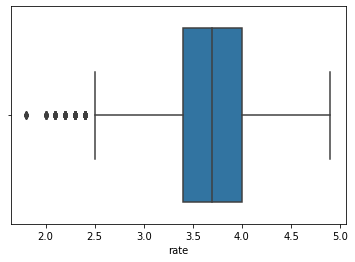

In [12]:
sb.boxplot(zdata['rate'])

From the above boxplot we see that the values of rate are between 0 and 5. The outliers shown in the plot is not to be considered as outliers.

2. Cost

<AxesSubplot:xlabel='cost'>

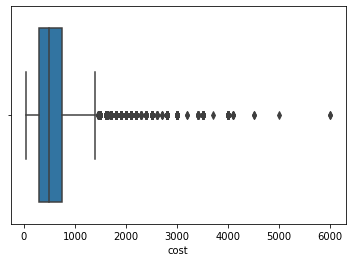

In [11]:
sb.boxplot(zdata['cost'])

We dont see any outliers.

# EXPLORATORY DATA ANALYSIS
This dataset contains reviews of restaurants in Bangalore from Zomato.

**1. Most Famous Restaurant Chains in Bangalore**

A chain restaurant is a group of restaurants with many different locations that share a name and concept. We first find the top 10 restaurant chains. The ordering is done based on the number of franchises a restaurant has. We assume that the more the number of franchises the more popular it is.

From the bar plot below we see that Cafe Coffee Day has the most number of franchises in Bangalore.


Text(0.5, 0, 'Number of outlets')

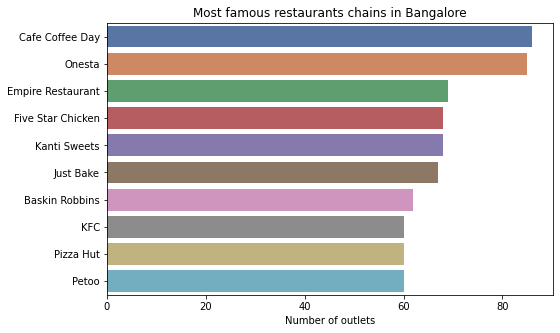

In [14]:
plt.figure(figsize=(8,5))
chains=zdata['name'].value_counts()[:10]
#print(chains)
sb.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangalore")
plt.xlabel("Number of outlets")

**2. Types of Restaurants in Bangalore**

Text(0.5, 1.0, 'Types of Restaurant')

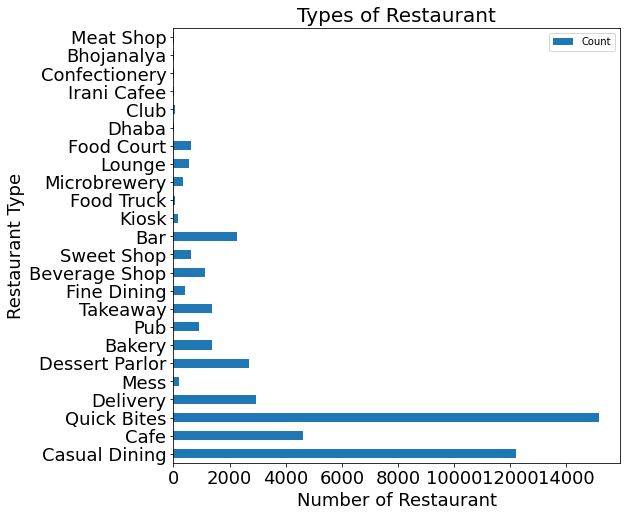

In [15]:
rTypes=[]
rCount=[]
for t in zdata['rest_type']:
    t1=t.split(', ')
    for i in t1:
        if i not in rTypes:
            rTypes.append(i)
            rCount.append(1)
        else:
            index=rTypes.index(i)
            rCount[index]+=1
df = pd.DataFrame({'Restaurant Type': rTypes, 'Count': rCount})
ax = df.plot.barh(x='Restaurant Type', y='Count',figsize=(8,8), fontsize=18)
ax.set_xlabel("Number of Restaurant",fontsize=18) 
ax.set_ylabel("Restaurant Type",fontsize=18)
ax.set_title("Types of Restaurant", fontsize=20)

**3.Distribution of Restaurant Rating**

From the following,we can see that on average the restaurants in our dataset has a rating between 3.5 and 4.0. There are very few restaurants with a rating of less than 3.0.

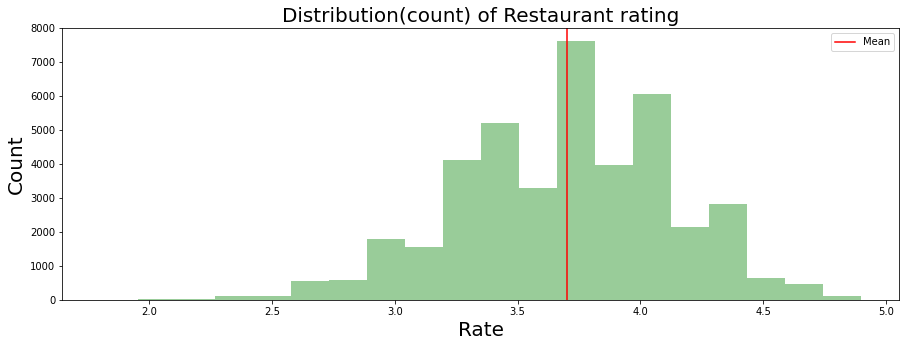

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sb.distplot(zdata.rate,kde=False,color = 'g',ax =ax,bins=20);
ax.axvline(zdata.rate.mean(), 0, 1, color='r', label='Mean')
ax.legend();
ax.set_ylabel('Count',size=20)
ax.set_xlabel('Rate',size=20)
ax.set_title('Distribution(count) of Restaurant rating',size=20);

**4. Top Favourite Cuisines**

In [9]:
def get_top_words(column, top_nu_of_words, nu_of_word):
    
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    
    bag_of_words = vec.fit_transform(column)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:top_nu_of_words]



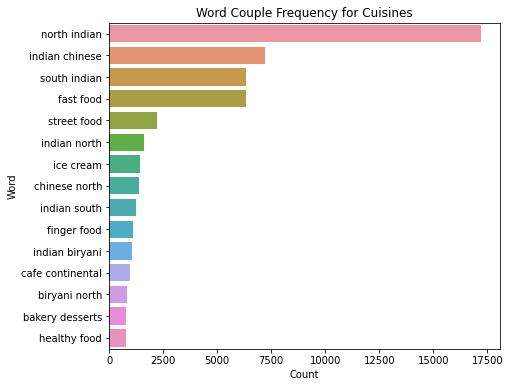

In [10]:
lst = get_top_words(zdata['cuisines'], 15, (2,2))
df_words = pd.DataFrame(lst, columns=['Word', 'Count'])
plt.figure(figsize=(7,6))
sb.barplot(data=df_words, x='Count', y='Word')
plt.title('Word Couple Frequency for Cuisines');

**5. Mean Rating of Each Restaurant**

In [12]:
restaurants = list(zdata['name'].unique())
zdata['Mean Rating'] = 0
for i in range(len(restaurants)):
    zdata['Mean Rating'][zdata['name'] == restaurants[i]] = zdata['rate'][zdata['name'] == restaurants[i]].mean()   
#Scaling the mean rating values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (1,5))
zdata[['Mean Rating']] = scaler.fit_transform(zdata[['Mean Rating']]).round(2)
zdata[['name','rate','Mean Rating']].head()

,name,rate,Mean Rating
0,Jalsa,4.1,3.99
1,Spice Elephant,4.1,3.97
2,San Churro Cafe,3.8,3.58
3,Addhuri Udupi Bhojana,3.7,3.45
4,Grand Village,3.8,3.58


# Fuzzy logic Implementation:

In [13]:
pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 13.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=226a71ac8bc6e06ec7fc5109c19061eefb448c3c148583806bb71c7d72d2d714
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


In [14]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [15]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
meanrate = ctrl.Antecedent(np.arange(1, 6, 1), 'meanrate')
recm = ctrl.Consequent(np.arange(0, 3, 1), 'recm')

# Auto-membership function population is possible with .automf(3, 5, or 7)
meanrate.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
recm['low'] = fuzz.trimf(recm.universe, [0, 0, 1])
recm['medium'] = fuzz.trimf(recm.universe, [0, 1, 2])
recm['high'] = fuzz.trimf(recm.universe, [1, 2, 2])

to help understand what the membership looks like, use the view methods.

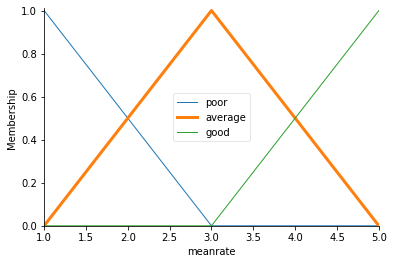

In [16]:
meanrate['average'].view()

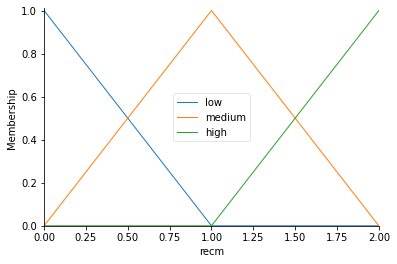

In [17]:
recm.view()

# Fuzzy rules
Now, to make these triangles useful, we define the fuzzy relationship between input and output variables. For the purposes of our system, consider three simple rules:

  1. If the restaurant is great, then the chance to be recommended will be high
  2. If the restaurant is decent, then the chance to be recommended will be medium
  3. If the restaurant is bad, then the chance to be recommended will be low
  
Most people would agree on these rules, but the rules are fuzzy. Mapping the imprecise rules into a defined, actionable tip is a challenge. This is the kind of task at which fuzzy logic excels.

In [18]:
rule1 = ctrl.Rule(meanrate['poor'], recm['low'])
rule2 = ctrl.Rule(meanrate['average'], recm['medium'])
rule3 = ctrl.Rule(meanrate['good'], recm['high'])

#rule1.view()

# Control System Creation and Simulation
Now that we have our rules defined, we can simply create a control system via:

In [19]:
recm_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In order to simulate this control system, we will create a ControlSystemSimulation. 

In [20]:
recommending = ctrl.ControlSystemSimulation(recm_ctrl)

We can now simulate our control system by simply specifying the inputs and calling the compute method.

In [21]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
recommending.input['meanrate'] =2.0

# Crunch the numbers
recommending.compute()

0.880952380952381


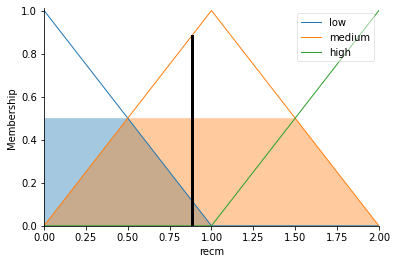

In [22]:
print (recommending.output['recm'])
recm.view(sim=recommending)

# Location Dataset for Bangalore 

In [23]:
df = pd.read_csv('../input/blr-locations-lat-long/location.csv')
df.head(10)

,Location,Latitude,Longitude
0,Bannerghatta Road,12.807066,77.578735
1,Banashankari,12.925453,77.546761
2,Basavanagudi,12.942117,77.575361
3,Bellandur,12.937562,77.670097
4,Brigade Road,12.970703,77.606808
5,Brookefield,12.973864,77.713768
6,BTM,12.916576,77.610116
7,Church Street,12.975001,77.604675
8,Electronic City,12.840711,77.676369
9,Frazer Town,13.071300,77.5905


In [24]:
X=df.loc[:,['Location','Latitude','Longitude']]

# Scatter Plot of Locations of the Restaurant

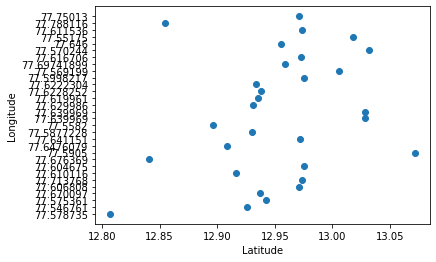

In [25]:
plt.scatter(X.Latitude,X.Longitude)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [26]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=8)
y_predicted=km.fit_predict(X[['Longitude','Latitude']])
y_predicted

array([5, 3, 3, 0, 6, 2, 0, 6, 7, 1, 0, 6, 3, 3, 6, 6, 0, 0, 0, 0, 6, 1,
       2, 6, 1, 0, 1, 6, 4, 2], dtype=int32)

In [27]:
X['cluster']=y_predicted

In [28]:
X.set_index('Location', inplace=True)

In [29]:
#putting cluster in main dataset
cities=zdata['city']
clst=[]
#cities
for i in zdata.index:
    cl=X['cluster'][zdata['city'][i]]
    clst.append(cl)
    #zdata['clusters'][i]=cl
zdata['clusters']=clst


# No. of Restaurants in Each Location:

<AxesSubplot:>

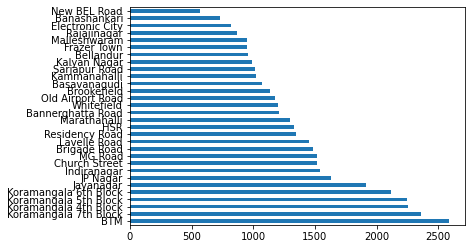

In [30]:
zdata['city'].value_counts().plot(kind='barh')

In [31]:
ss=zdata[['name','rate','Mean Rating','city','clusters']]
ss=ss.drop_duplicates(subset=['name','Mean Rating'])
#ss[ss.city=='Banashankari'].index
#dd=ss['Mean Rating']['Jalsa'].drop_duplicates()
#ss['Mean Rating'][5448]

#ss[ss.clusters==2].index
#ss['Mean Rating']['KFC']
#float(dd)

In [32]:
def newUser(loc):
    cluster1=X['cluster'][loc]
    #cities=list(X[X.cluster==1].index)
    restr_ind=list(ss[ss.clusters==cluster1].index)
    df_new = pd.DataFrame(columns=['name','location','cuisines', 'Mean Rating', 'cost'])
    
    for each in restr_ind:
        mr=ss['Mean Rating'][each]
        recommending.input['meanrate'] =mr
        recommending.compute()
        if(recommending.output['recm']>=1):
            df_new = df_new.append(pd.DataFrame(zdata.loc[(zdata.index == each),
                    ['name','location','cuisines','Mean Rating', 'cost']].sample()))
    
    df_new = df_new.drop_duplicates()
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)
            
    print('TOP %s RESTAURANTS : ' % (str(len(df_new))))
    
    return df_new    
        
        

In [33]:
newUser('Sarjapur Road')

TOP 10 RESTAURANTS : 


,name,location,cuisines,Mean Rating,cost
39345,Rural Blues,Sarjapur Road,"European, Mediterranean, Asian, North Indian, ...",4.23,1300.0
39532,Biryani Rooh-e-Khaas,HSR,"Biryani, Mughlai",4.10,500.0
39396,Birbal Darbar,Sarjapur Road,"North Indian, Chinese, Biryani",3.97,600.0
39147,Homelicious Food,Bellandur,North Indian,3.84,200.0
39075,Ella's Petscape Cafe,Sarjapur Road,"Cafe, Fast Food, Sandwich, Pizza",3.84,700.0
39072,Creamvilla,Sarjapur Road,"Cafe, Desserts, Ice Cream",3.71,600.0
39297,Venkataramana Nellore Mess,HSR,"Andhra, South Indian",3.71,300.0
39504,Grandma's Recipe,Sarjapur Road,"Biryani, Kebab, Kerala",3.71,400.0
39879,Tumbites,Bellandur,North Indian,3.71,200.0
39182,Chatori Tongue,Sarjapur Road,Street Food,3.71,100.0


In [34]:
zdata.set_index('name', inplace=True)

In [35]:
#zdata.set_index('name', inplace=True)
indices = pd.Series(zdata.index)
# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix1 = tfidf.fit_transform(zdata['cuisines'])
cosine_similarities1 = linear_kernel(tfidf_matrix1, tfidf_matrix1)

In [37]:
def recommend2(name,loc, cosine_similarities=cosine_similarities1):
    
    # Create a list to put top restaurants
    recommend_restaurant = []
    rest_loc=[]
    
    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    cluster1=X['cluster'][loc]
    #print("Location Entered: ",cluster1)
    for each in top30_indexes:
        nameR=list(zdata.index)[each]
        locR= list(zdata.city)[each]
        cluster2=X['cluster'][locR]
        #print(nameR,locR,cluster2)
        if(cluster1==cluster2):
            recommend_restaurant.append(nameR)
            rest_loc.append(locR)
            
    #print(rest_loc)
    
    df_new = pd.DataFrame(columns=['location','cuisines', 'Mean Rating', 'cost'])
    i=0
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        mr=float(zdata.loc[(zdata.index == each) & (zdata.city==rest_loc[i]),
                    ['location','cuisines','Mean Rating', 'cost']].sample()['Mean Rating'])
        recommending.input['meanrate'] =mr
        recommending.compute()
        if(recommending.output['recm']>=1):
            df_new = df_new.append(pd.DataFrame(zdata.loc[(zdata.index == each) & (zdata.city==rest_loc[i]),
                    ['location','cuisines','Mean Rating', 'cost']].sample()))
        i+=1
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates()
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)
    
    
    
    print('TOP %s RESTAURANTS LIKE %s: ' % (str(len(df_new)), name))
    
    return df_new


In [38]:
result_cuisine=recommend2("KFC","HSR")
result_cuisine

TOP 8 RESTAURANTS LIKE KFC: 


,location,cuisines,Mean Rating,cost
Leon Grill,Koramangala 5th Block,"Burger, Fast Food",4.11,500.0
Leon Grill,Jeevan Bhima Nagar,"Burger, Fast Food",4.11,500.0
Cheesy Juicy Burgers,HSR,"Burger, Fast Food",3.60,500.0
KFC,HSR,"Burger, Fast Food",3.38,400.0
KFC,Sarjapur Road,"Burger, Fast Food",3.38,450.0
KFC,Koramangala 6th Block,"Burger, Fast Food",3.38,450.0
McDonald's,Old Airport Road,"Burger, Fast Food",3.28,500.0
McDonald's,BTM,"Burger, Fast Food",3.28,500.0


In [41]:
result_cuisine=recommend2("Bubbles","Indiranagar")
result_cuisine

TOP 10 RESTAURANTS LIKE Bubbles: 


,location,cuisines,Mean Rating,cost
Cafe Coffee Day The Square,Lavelle Road,Cafe,3.97,1100.0
The Flying Squirrel,Brigade Road,Cafe,3.84,450.0
Talk Over Table,Jeevan Bhima Nagar,Cafe,3.84,500.0
The Pipe Rack,Kalyan Nagar,Cafe,3.68,700.0
Chai Ki Tapri,MG Road,Cafe,3.45,250.0
Brew Bakes Cafe,Kalyan Nagar,Cafe,3.45,500.0
The Coffee Bean & Tea Leaf,MG Road,Cafe,3.44,700.0
Cafe Get Hooked,Banaswadi,Cafe,3.34,600.0
Barista,CV Raman Nagar,Cafe,3.31,300.0
Cafe Oleiva,Thippasandra,Cafe,3.04,500.0


In [42]:
result_cuisine=recommend2("Meghana Foods","Church Street")
result_cuisine

TOP 4 RESTAURANTS LIKE Meghana Foods: 


,location,cuisines,Mean Rating,cost
SS Bucket Biryani,Kammanahalli,"Biryani, North Indian, Chinese",3.80,600.0
Hyderabad Biryaani House,Richmond Road,"Biryani, North Indian, Chinese",3.79,550.0
Biryani Palace,Nagawara,"Biryani, North Indian, Chinese",3.51,750.0
Bucket Biriyani,Banaswadi,"Biryani, North Indian, Chinese",3.19,600.0
